In [2]:
%matplotlib inline
import numpy as np
from scipy import misc
import random
import itertools
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

im = misc.imread('./monaLisa.jpg')
print ("a single coordinate: (red feature)", im[1, 1, 0])
height, width, dim = im.shape
print (height, width)

# Preprocessing the input: generate 5000 random coordinates (y, x) out of 900*604 coordinates in total
sample_coordinates = [[int((height-1)*random.random()), int((width-1)*random.random())] for i in range(5000)]
print (sample_coordinates[0], sample_coordinates[1])
print ("length of coordinates sample", len(sample_coordinates))

a single coordinate: (red feature) 104
900 604
[149, 250] [347, 180]
length of coordinates sample 5000


543600 [0, 0] [0, 1]
shape of predicted image:  (543600, 3)
[[ 0.28560784  0.41062745  0.30815686]
 [ 0.28560784  0.41062745  0.30815686]
 [ 0.28560784  0.41062745  0.30815686]
 ..., 
 [ 0.10603922  0.06984314  0.17168627]
 [ 0.10603922  0.06984314  0.17168627]
 [ 0.10603922  0.06984314  0.17168627]]


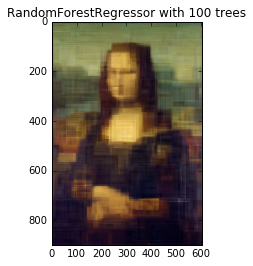

In [7]:
# Preprocessing the output: 
# Regress all three values at once, so your function maps (x, y) coordinates to (r, g ,b) values:
rgb_values = np.array([[im[y,x,0]/255.0, im[y,x,1]/255.0, im[y,x,2]/255.0]  for [y,x] in sample_coordinates])

# map the coordinates to three dimensional colors
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
# fitting rgb values
estimator = estimator.fit(sample_coordinates, rgb_values)
predict_coordinates = [[y,x] for y in range(height) for x in range(width)]
print (len(predict_coordinates), predict_coordinates[0], predict_coordinates[1])
predicted_rgb = estimator.predict(predict_coordinates)
predicted_im = np.array(predicted_rgb)
print ("shape of predicted image: ", predicted_im.shape)
print (predicted_im)
predicted_im = np.reshape(predicted_im, (height, width, 3))
plt.title("RandomForestRegressor with 100 trees")
plt.imshow(predicted_im)
plt.show()

543600 [0, 0] [0, 1]
shape of predicted image:  (543600, 3)
[[ 0.28943747  0.41503898  0.29045971]
 [ 0.28943747  0.41503898  0.29045971]
 [ 0.28943747  0.41503898  0.29045971]
 ..., 
 [ 0.11115837  0.07051468  0.16879666]
 [ 0.11115837  0.07051468  0.16879666]
 [ 0.11115837  0.07051468  0.16879666]]


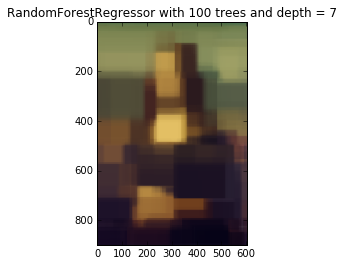

In [30]:
# Repeat the experiment for a random forest of depth 7, but with number of trees equal 
# to 1, 3, 5, 10, and 100. How does the number of trees impact the result?

# map the coordinates to three dimensional colors
# changing the tree number to 1, 3, 5, 10, and 100, and compare
estimator = RandomForestRegressor(max_depth=7, n_estimators=100)
# fitting rgb values
estimator = estimator.fit(sample_coordinates, rgb_values)
predict_coordinates = [[y,x] for y in range(height) for x in range(width)]
print (len(predict_coordinates), predict_coordinates[0], predict_coordinates[1])
predicted_rgb = estimator.predict(predict_coordinates)
predicted_im = np.array(predicted_rgb)
print ("shape of predicted image: ", predicted_im.shape)
print (predicted_im)
predicted_im = np.reshape(predicted_im, (height, width, 3))
plt.title("RandomForestRegressor with 100 trees and depth = 7")
plt.imshow(predicted_im)
plt.show()

543600 [0, 0] [0, 1]
shape of predicted image:  (543600, 3)
[[ 0.28627451  0.39607843  0.29803922]
 [ 0.28627451  0.39607843  0.29803922]
 [ 0.28627451  0.39607843  0.29803922]
 ..., 
 [ 0.11372549  0.0627451   0.16470588]
 [ 0.11372549  0.0627451   0.16470588]
 [ 0.11372549  0.0627451   0.16470588]]


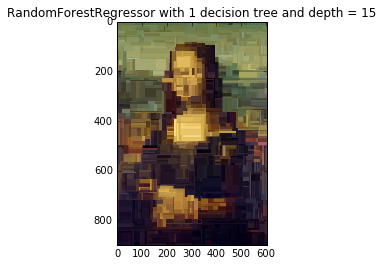

In [21]:
# Repeat the experiment for a random forest containing a single decision tree, but with depths
# 1, 2, 3, 5, 10, and 15. How does depth impact the result?

# map the coordinates to three dimensional colors
# changing the depth to 1, 2, 3, 5, 10, and 15, and compare
estimator = RandomForestRegressor(max_depth=15, n_estimators=1)
# fitting rgb values
estimator = estimator.fit(sample_coordinates, rgb_values)
predict_coordinates = [[y,x] for y in range(height) for x in range(width)]
print (len(predict_coordinates), predict_coordinates[0], predict_coordinates[1])
predicted_rgb = estimator.predict(predict_coordinates)
predicted_im = np.array(predicted_rgb)
print ("shape of predicted image: ", predicted_im.shape)
print (predicted_im)
predicted_im = np.reshape(predicted_im, (height, width, 3))
plt.title("RandomForestRegressor with 1 decision tree and depth = 15")
plt.imshow(predicted_im)
plt.show()

543600
shape of predicted image:  (543600, 3)
[[ 0.30196078  0.41960784  0.30980392]
 [ 0.30196078  0.41960784  0.30980392]
 [ 0.30196078  0.41960784  0.30980392]
 ..., 
 [ 0.08627451  0.0745098   0.18039216]
 [ 0.08627451  0.0745098   0.18039216]
 [ 0.08627451  0.0745098   0.18039216]]


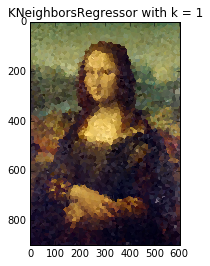

In [8]:
# k-NN regressor, where k = 1
from sklearn.neighbors import KNeighborsRegressor

rgb_estimator = KNeighborsRegressor(n_neighbors=1)
rgb_estimator.fit(sample_coordinates, rgb_values)
predict_coordinates = [[y,x] for y in range(height) for x in range(width)]
print (len(predict_coordinates))
predicted_rgb = rgb_estimator.predict(predict_coordinates)
print ("shape of predicted image: ", predicted_rgb.shape)
print (predicted_rgb)
predicted_rgb = np.reshape(predicted_rgb, (height, width, 3))
plt.title("KNeighborsRegressor with k = 1")
plt.imshow(predicted_rgb)
plt.show()

543600 [0, 0] [0, 1]
shape of predicted image:  (543600, 3)
[[ 0.3152667   0.42152254  0.27207976]
 [ 0.3152667   0.42152254  0.27207976]
 [ 0.3152667   0.42152254  0.27207976]
 ..., 
 [ 0.13567401  0.07053763  0.14334257]
 [ 0.13567401  0.07053763  0.14334257]
 [ 0.13567401  0.07053763  0.14334257]]


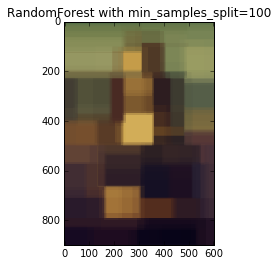

In [38]:
# Repeat the experiment for a random forest containing 10 decision tree with depths
# 10 and different min_samples_split values

# map the coordinates to three dimensional colors
# changing the depth to 1, 2, 3, 5, 10, and 15, and compare
estimator = RandomForestRegressor(max_depth=10, n_estimators=10, min_samples_split=100)
# fitting rgb values
estimator = estimator.fit(sample_coordinates, rgb_values)
predict_coordinates = [[y,x] for y in range(height) for x in range(width)]
print (len(predict_coordinates), predict_coordinates[0], predict_coordinates[1])
predicted_rgb = estimator.predict(predict_coordinates)
predicted_im = np.array(predicted_rgb)
print ("shape of predicted image: ", predicted_im.shape)
print (predicted_im)
predicted_im = np.reshape(predicted_im, (height, width, 3))
plt.title("RandomForest with min_samples_split=100")
plt.imshow(predicted_im)
plt.show()